In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
#%matplotlib inline

Text(0, 0.5, 'y')

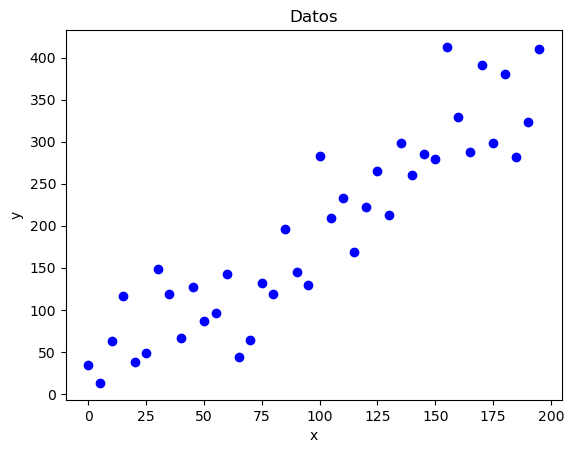

In [8]:
# Gener datos sintéticos
def f(x):  # función f(x) = 3*x + 10 + 20*ruido
    np.random.seed(42)
    y = 2*x + 10 + 50*np.random.randn(x.shape[0])
    return y
x = np.arange(0, 200, 5) 
y = f(x) 
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos')
plt.xlabel('x')
plt.ylabel('y')

In [9]:
# Importamos la clase de Regresión Lineal de scikit-learn y metricas de evaluacion
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [10]:
# Creamos un objeto de la clase LinearRegression
regresion_lineal = LinearRegression()
regresion_lineal.fit(x.reshape(-1,1), y) 

regresion_lineal.fit(x.reshape(-1,1), y) 

LinearRegression()

In [11]:
#Obteniendo los coeficientes:

b_1 = regresion_lineal.coef_
b_0 = regresion_lineal.intercept_

print(f'Pendiente: {b_1}. Intercepto: {b_0}')

Pendiente: [1.79588046]. Intercepto: 18.969813143417127


In [12]:
n=len(x)

y_predicted = b_0 + b_1*x

residuals = (y - y_predicted)

# sum of squared errors
sse = np.sum(residuals**2)

# total sum of squares (y)
#sst = np.sum( (y - np.mean(y))**2 )

# total sum of squares (x)
sst_x = np.sum( (x - np.mean(x))**2 )

# standard error of regression
s = np.sqrt(sse/(n-2))

# our alpha for 95% confidence
alpha = 0.05

# degrees of freedom
dof = n - 2

In [13]:
# standard error of the gradient (slope)
sB1 = s/np.sqrt(sst_x)

# t-value for alpha/2 with n-2 degrees of freedom
t = stats.t.ppf(1-alpha/2, dof)

# compute the upper and lower limits on our B1 (slope) parameter
B1_upper = b_1 + t * sB1
B1_lower = b_1 - t * sB1

# compute the corresponding upper and lower B0 values (y intercepts)
B0_upper = y.mean() - B1_upper*x.mean()
B0_lower = y.mean() - B1_lower*x.mean()

In [11]:
print(f'Intervalo de confianza para B1: ({B1_lower}, {B1_upper})')
print(f'Intervalo de confianza para B0: ({B0_lower}, {B0_upper})')


Intervalo de confianza para B1: ([1.99970042], [2.00023736])
Intervalo de confianza para B0: ([10.30345672], [9.76652568])
